Import Relevant Packages
We will use `pulp` for optimization and `matplotlib` for visualization.

In [22]:
from pulp import LpMaximize, LpProblem, LpVariable, value
import matplotlib.pyplot as plt

Initialize the Problem

In [24]:
model = LpProblem("Student_Time_Management", LpMaximize)

Parameters ( Can Be adjusted)

In [26]:
num_courses = 5
sports_sessions = 3 

Variables

In [28]:
x1 = LpVariable("Classes", lowBound=20, upBound=20)  # Fixed class hours
x2 = LpVariable("Self_Study", lowBound=3*num_courses)  # Min study hours
x3 = LpVariable("Sports", lowBound=2*sports_sessions)  # Min sports hours 
x4 = LpVariable("Societies", lowBound=3)              # Min society hours
x5 = LpVariable("Leisure", lowBound=14)               # Min leisure hours

Objective Function

In [30]:
model += 0.4*x2 + 0.3*x1 + 0.2*x3 + 0.05*x4 + 0.05*x5, "Total_Productivity"


Constraints

In [ ]:
model += x1 + x2 + x3 + x4 + x5 <= 119, "Total_Time_Limit"

Solve

In [34]:
model.solve()

1

Result Printing

In [36]:
print(f"Status: {'Optimal' if model.status == 1 else 'Infeasible'}")
print("\n--- Optimal Allocation ---")
print(f"Classes: {value(x1)} hours")
print(f"Self-Study: {value(x2)} hours")
print(f"Sports: {value(x3)} hours")
print(f"Societies: {value(x4)} hours")
print(f"Leisure: {value(x5)} hours")
print(f"Total Hours Allocated: {value(x1 + x2 + x3 + x4 + x5)}")

Status: Optimal

--- Optimal Allocation ---
Classes: 20.0 hours
Self-Study: 76.0 hours
Sports: 6.0 hours
Societies: 3.0 hours
Leisure: 14.0 hours
Total Hours Allocated: 119.0


 Data Visualization

In [38]:
activities = ['Classes', 'Self-Study', 'Sports', 'Societies', 'Leisure']
hours = [value(x1), value(x2), value(x3), value(x4), value(x5)]

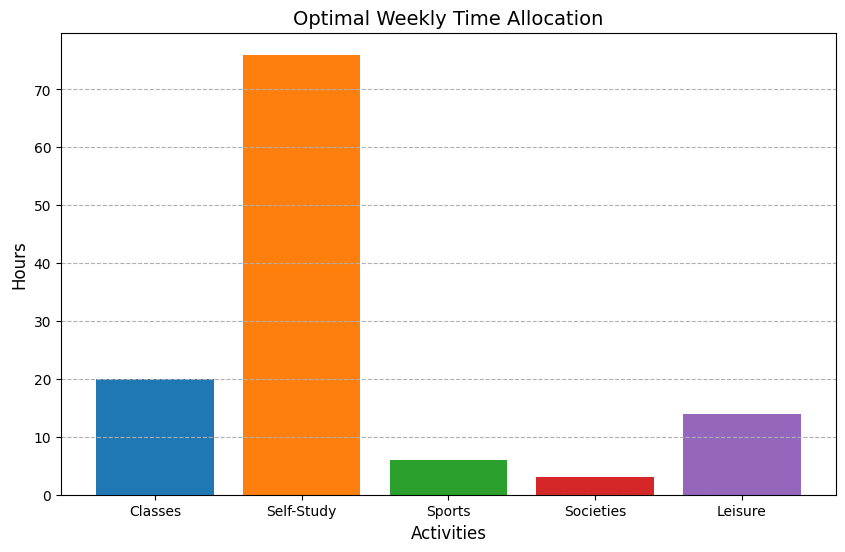

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(activities, hours, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title("Optimal Weekly Time Allocation", fontsize=14)
plt.xlabel("Activities", fontsize=12)
plt.ylabel("Hours", fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.savefig('time_allocation.png')
plt.show()